In [1]:
import pandas as pd
import os
import seaborn as sns


from matplotlib import pyplot as plt

In [3]:
WORKING_DIR = "/work/dlclarge1/matusd-rpi/RPI/" # change this to your working directory
ANNOT_DIR = "data/annotations/"
INTER_DIR = "data/interactions/"
EMB_DIR = "data/embeddings/"
STATS_DIR = "data/statistics/"
RNAINTER_DIR = "data/RNAInter/"

os.chdir(WORKING_DIR)

In [4]:
rpi_df = pd.read_parquet(os.path.join(INTER_DIR, "limited_interactions.parquet"))

## 1. Sequence data analysis

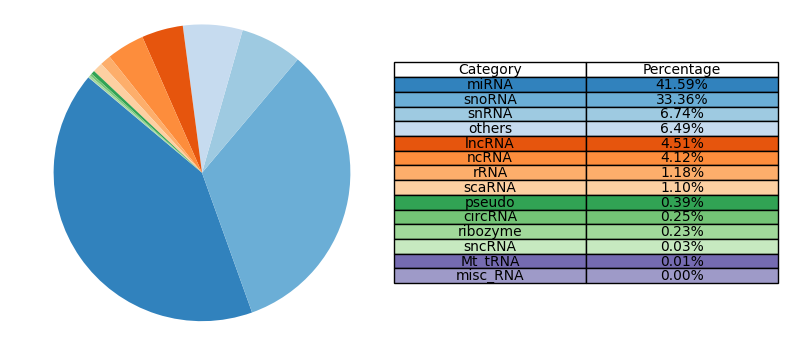

In [40]:
# RNA category pie chart

# Grouping by 'Category1' and counting the occurrences
category_counts = rpi_df['Category1'].value_counts()

# Calculating percentages
category_percentages = category_counts / category_counts.sum() * 100

# Sorting to identify the biggest categories
sorted_categories = category_percentages.sort_values(ascending=False)

# Creating the pie chart with a colorblind-friendly palette
fig, ax = plt.subplots()
colors = plt.cm.tab20c.colors  # A colorblind-friendly palette
pie_slices, _ = ax.pie(sorted_categories, colors=colors, startangle=140)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Formatting the table with percentages rounded to two decimals
table_data = [[category, f"{percent:.2f}%"] for category, percent in zip(sorted_categories.index, sorted_categories)]

# Creating a table with category names and percentages
table = ax.table(cellText=table_data, colLabels=['Category', 'Percentage'], cellLoc='center', loc='right')

# Coloring the cell backgrounds to match the pie chart
for i, color in enumerate(colors[:len(table_data)]):
    table[(i+1, 0)].set_facecolor(color)
    table[(i+1, 0)].set_edgecolor('black')
    table[(i+1, 1)].set_facecolor(color)
    table[(i+1, 1)].set_edgecolor('black')

# Adjusting layout
plt.subplots_adjust(left=0.2, bottom=0.2, right=0.8)

plt.show()

# save figure to file
fig.savefig(os.path.join(STATS_DIR, "rna_category_pie_chart.png"), bbox_inches='tight')

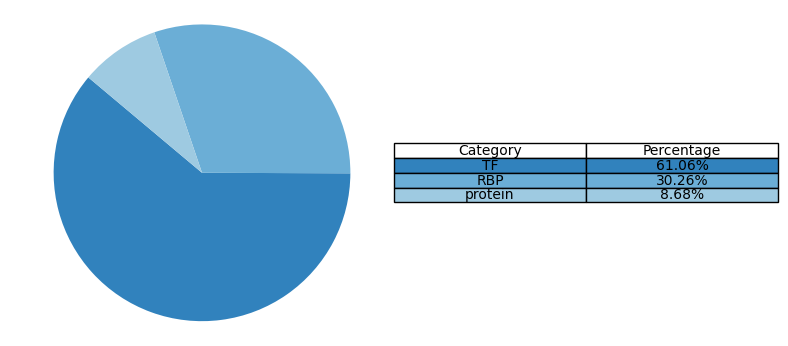

In [41]:
# protein category pie chart

# Grouping by 'Category2' and counting the occurrences
category_counts = rpi_df['Category2'].value_counts()

# Calculating percentages
category_percentages = category_counts / category_counts.sum() * 100

# Sorting to identify the biggest categories
sorted_categories = category_percentages.sort_values(ascending=False)

# Creating the pie chart with a colorblind-friendly palette
fig, ax = plt.subplots()
colors = plt.cm.tab20c.colors  # A colorblind-friendly palette
pie_slices, _ = ax.pie(sorted_categories, colors=colors, startangle=140)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Formatting the table with percentages rounded to two decimals
table_data = [[category, f"{percent:.2f}%"] for category, percent in zip(sorted_categories.index, sorted_categories)]

# Creating a table with category names and percentages
table = ax.table(cellText=table_data, colLabels=['Category', 'Percentage'], cellLoc='center', loc='right')

# Coloring the cell backgrounds to match the pie chart
for i, color in enumerate(colors[:len(table_data)]):
    table[(i+1, 0)].set_facecolor(color)
    table[(i+1, 0)].set_edgecolor('black')
    table[(i+1, 1)].set_facecolor(color)
    table[(i+1, 1)].set_edgecolor('black')

# Adjusting layout
plt.subplots_adjust(left=0.2, bottom=0.2, right=0.8)

plt.show()

# save figure to file
fig.savefig(os.path.join(STATS_DIR, "protein_category_pie_chart.png"), bbox_inches='tight')

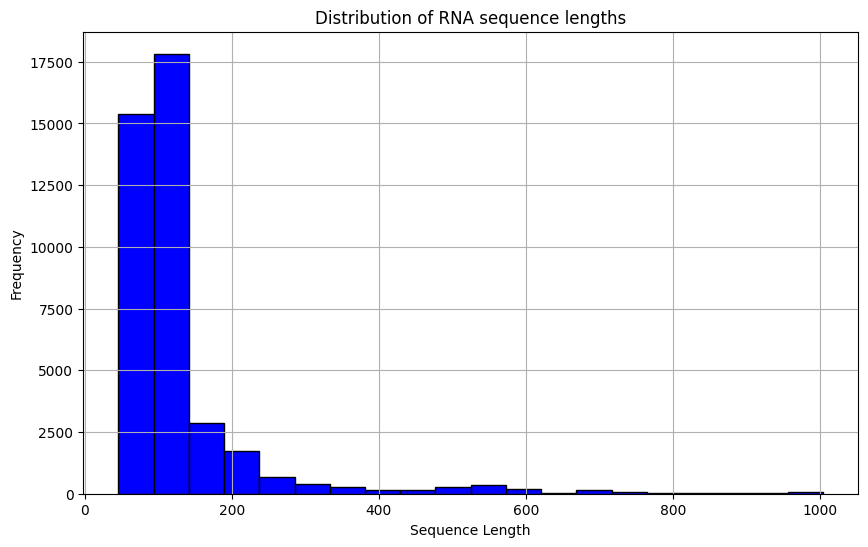

In [51]:
# RNA length distribution histogram

plt.figure(figsize=(10, 6))
plt.hist(rpi_df['Sequence_1_len'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of RNA sequence lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.grid(True)

# Save plot to file before showing it
plt.savefig(os.path.join(STATS_DIR, "rna_length_distribution.png"), bbox_inches='tight')

# Display the plot
plt.show()

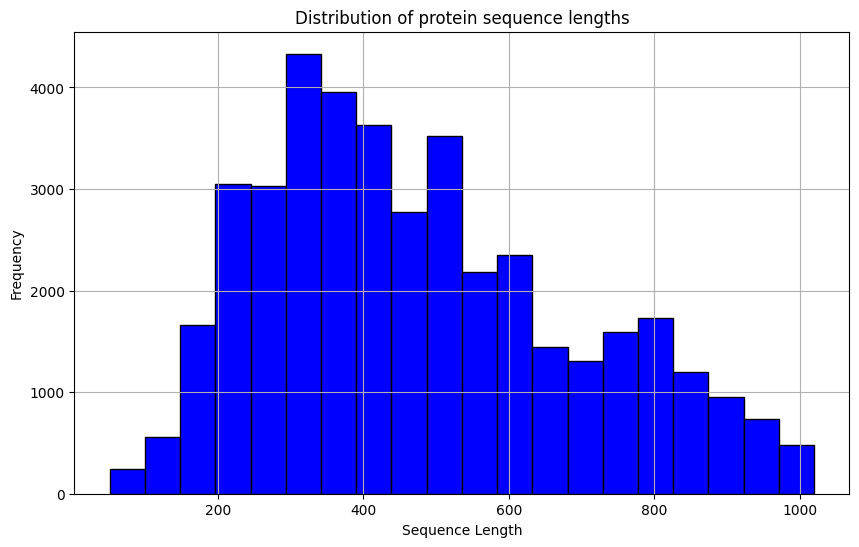

In [54]:
# protein length distribution histogram

plt.figure(figsize=(10, 6))
plt.hist(rpi_df['Sequence_2_len'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of protein sequence lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.grid(True)

# Save plot to file before showing it
plt.savefig(os.path.join(STATS_DIR, "protein_length_distribution.png"), bbox_inches='tight')

# Display the plot
plt.show()

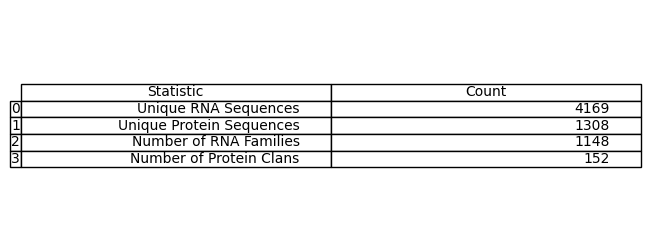

In [44]:
# Calculate the unique counts
unique_rna_sequences = rpi_df['Sequence_1'].nunique()
unique_protein_sequences = rpi_df['Sequence_2'].nunique()
number_rna_families = rpi_df['Sequence_1_family'].nunique()
number_protein_clans = rpi_df['Sequence_2_clan'].nunique()

# Prepare the summary table
summary_table = pd.DataFrame({
    'Statistic': ['Unique RNA Sequences', 'Unique Protein Sequences', 'Number of RNA Families', 'Number of Protein Clans'],
    'Count': [unique_rna_sequences, unique_protein_sequences, number_rna_families, number_protein_clans]
})

# Plot the table
fig, ax = plt.subplots(figsize=(8, 3))  # Adjust the size as needed
ax.axis('tight')
ax.axis('off')
pd.plotting.table(ax, summary_table, loc='center')

plt.show()

# Save the table as an image
plt.savefig(os.path.join(STATS_DIR, 'summary_uniques.png'), dpi=300, bbox_inches='tight')
plt.close()


## 2.Positive interactions analysis

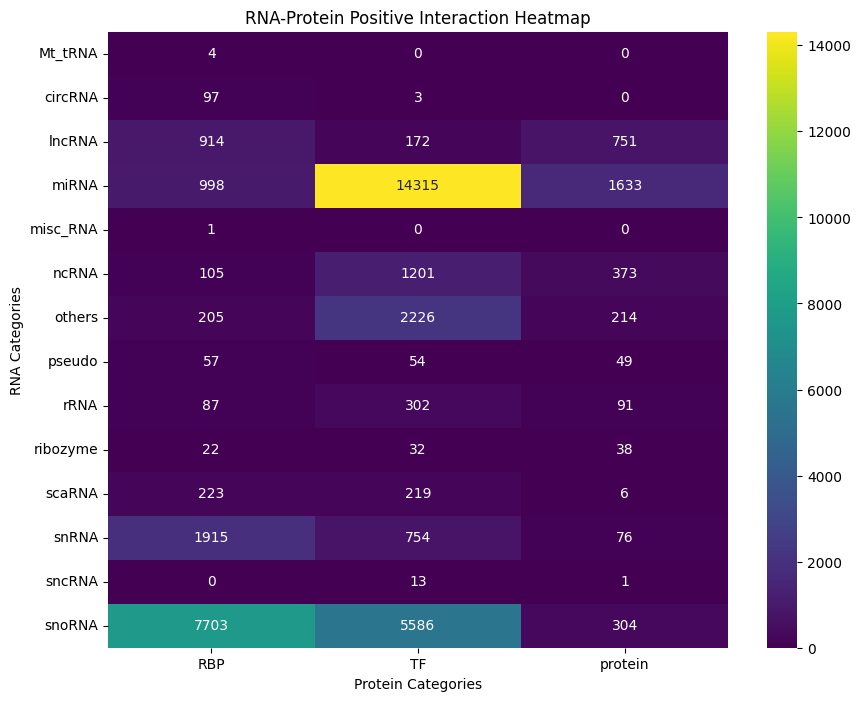

In [17]:
# Create a pivot table for the heatmap
pivot_table = rpi_df.pivot_table(index='Category1', columns='Category2', aggfunc='size', fill_value=0)

# Create the heatmap
plt.figure(figsize=(10, 8))  # You can adjust the size as needed
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='g')

# Add titles and labels as needed
plt.title('RNA-Protein Positive Interaction Heatmap')
plt.xlabel('Protein Categories')
plt.ylabel('RNA Categories')

# Save the heatmap to file
plt.savefig(os.path.join(STATS_DIR, 'positive_interaction_heatmap.png'), dpi=300, bbox_inches='tight')

# Display the heatmap
plt.show()
plt.close()

## 3. Negative interactions analysis

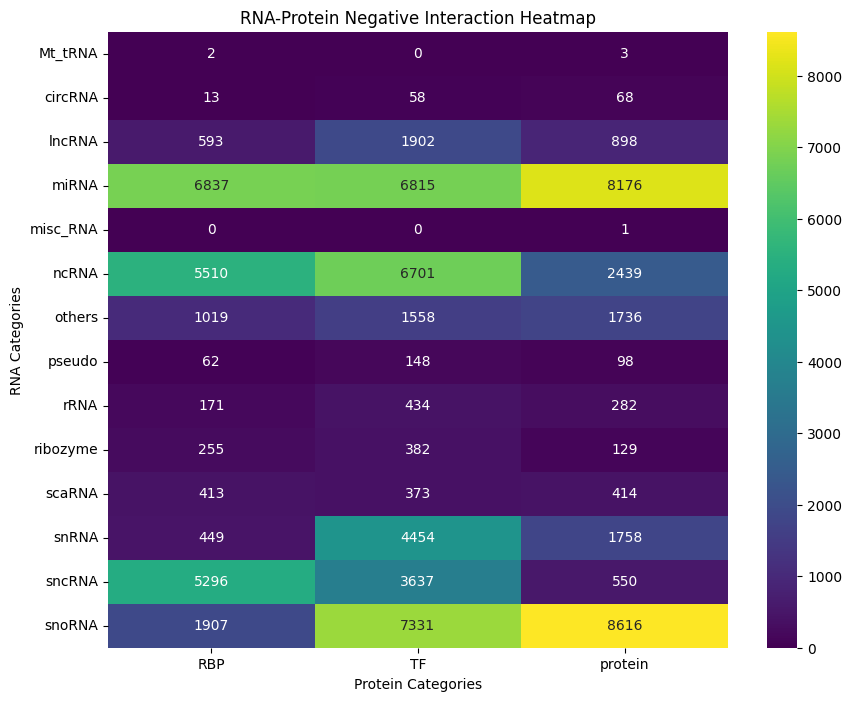

In [14]:
all_df = pd.read_parquet(os.path.join(INTER_DIR, "all_interactions.parquet"))
neg_df = all_df[all_df['interaction'] == False]

# Create a pivot table for the heatmap
pivot_table = neg_df.pivot_table(index='Category1', columns='Category2', aggfunc='size', fill_value=0)

# Create the heatmap
plt.figure(figsize=(10, 8))  # You can adjust the size as needed
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='g')

# Add titles and labels as needed
plt.title('RNA-Protein Negative Interaction Heatmap')
plt.xlabel('Protein Categories')
plt.ylabel('RNA Categories')

# Save the heatmap to file
plt.savefig(os.path.join(STATS_DIR, 'negative_interaction_heatmap.png'), dpi=300, bbox_inches='tight')

# Display the heatmap
plt.show()
plt.close()

## 4. All interactions analysis.

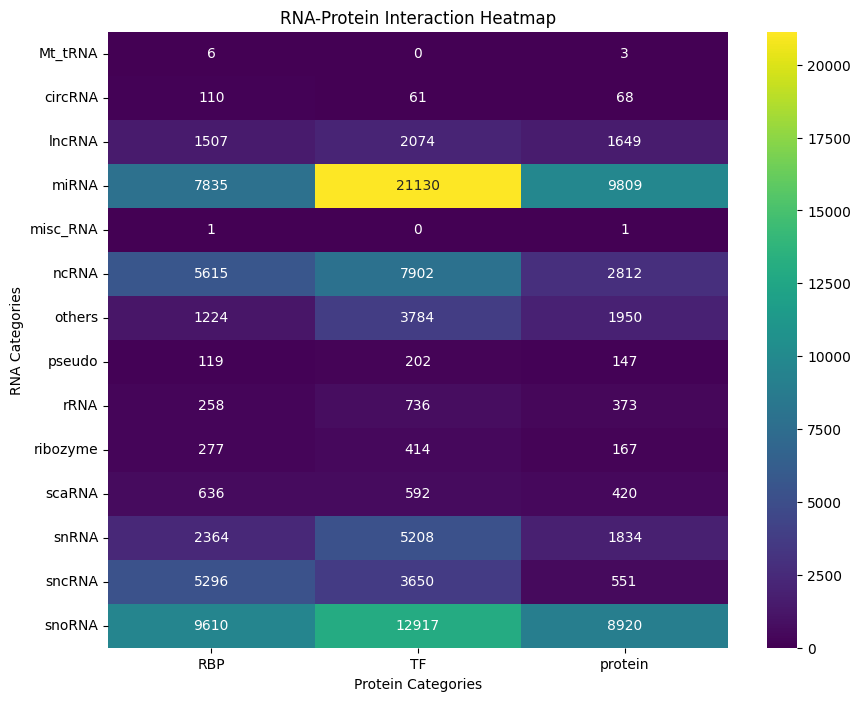

In [16]:
# Create a pivot table for the heatmap
pivot_table = all_df.pivot_table(index='Category1', columns='Category2', aggfunc='size', fill_value=0)

# Create the heatmap
plt.figure(figsize=(10, 8))  # You can adjust the size as needed
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='g')

# Add titles and labels as needed
plt.title('RNA-Protein Interaction Heatmap')
plt.xlabel('Protein Categories')
plt.ylabel('RNA Categories')

# Save the heatmap to file
plt.savefig(os.path.join(STATS_DIR, 'all_interaction_heatmap.png'), dpi=300, bbox_inches='tight')

# Display the heatmap
plt.show()
plt.close()